In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import imblearn as ib
from unbalanced_dataset import UnderSampler, OverSampler, SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ModuleNotFoundError: No module named 'seaborn'

In [56]:

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#df.value_counts()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<AxesSubplot:>

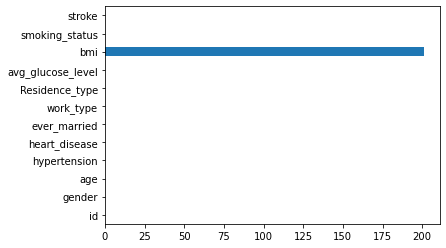

In [5]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

<AxesSubplot:ylabel='gender'>

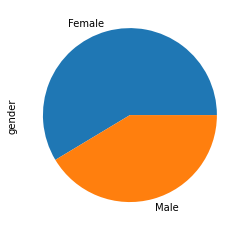

In [9]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

In [10]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

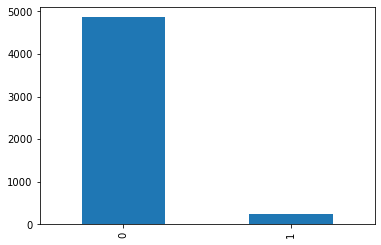

In [11]:
df['stroke'].value_counts().plot(kind="bar")

In [12]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


<AxesSubplot:>

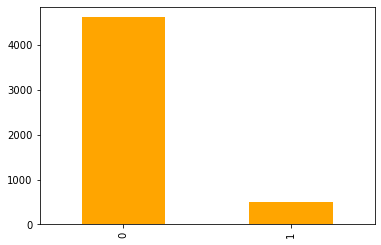

In [61]:
df['hypertension'].value_counts().plot(kind="bar",color = "orange")

In [15]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:ylabel='work_type'>

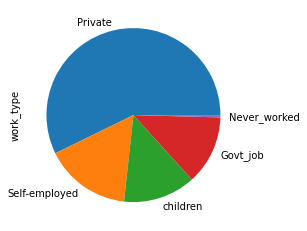

In [16]:
df['work_type'].value_counts().plot(kind="pie")

In [17]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:ylabel='smoking_status'>

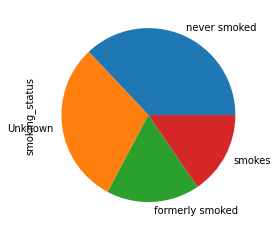

In [18]:
df['smoking_status'].value_counts().plot(kind="pie")

In [19]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:ylabel='Residence_type'>

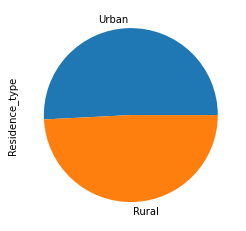

In [20]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

In [21]:
df['bmi'].isnull().sum()

201

<AxesSubplot:xlabel='bmi', ylabel='Count'>

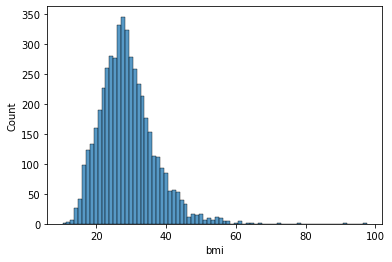

In [22]:
sns.histplot(data=df['bmi'])

<AxesSubplot:>

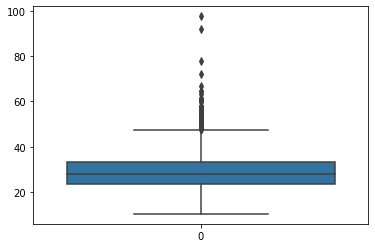

In [23]:
sns.boxplot(data=df['bmi'])

In [24]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    5000
True      110
Name: bmi, dtype: int64

In [25]:
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

In [26]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [27]:
df['stroke'].sum()/len(df)*100

4.87279843444227

In [28]:
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [29]:
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


<AxesSubplot:xlabel='age', ylabel='Count'>

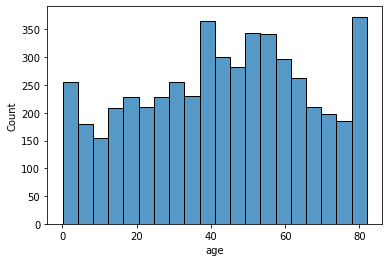

In [30]:
sns.histplot(data=df['age'])

<AxesSubplot:>

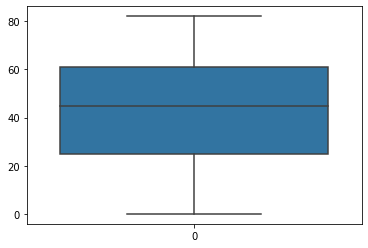

In [31]:
sns.boxplot(data=df['age'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

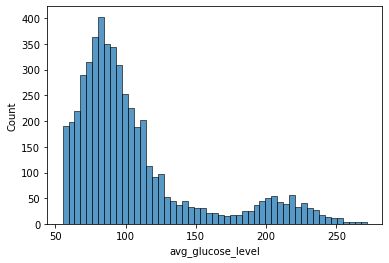

In [32]:
sns.histplot(data=df['avg_glucose_level'])

<AxesSubplot:>

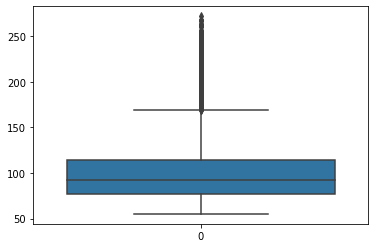

In [33]:
sns.boxplot(data=df['avg_glucose_level'])

In [34]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    4483
True      627
Name: avg_glucose_level, dtype: int64

<AxesSubplot:>

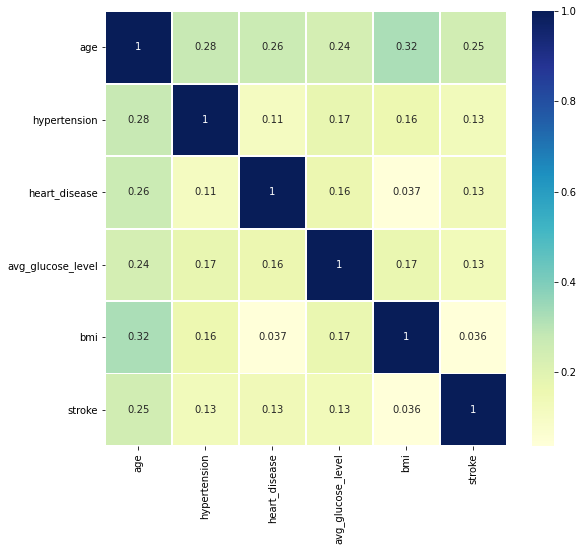

In [35]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

In [36]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<AxesSubplot:ylabel='heart_disease'>

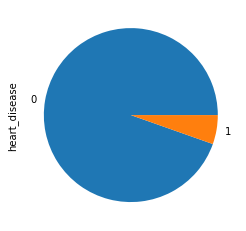

In [37]:
df['heart_disease'].value_counts().plot(kind="pie")

In [38]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:ylabel='ever_married'>

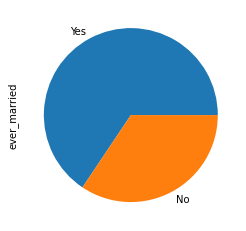

In [39]:
df['ever_married'].value_counts().plot(kind="pie")

<AxesSubplot:xlabel='stroke', ylabel='count'>

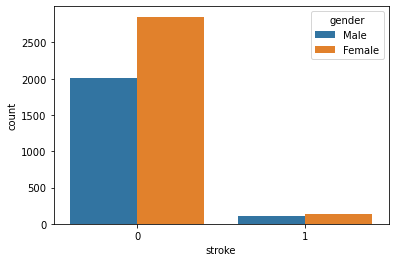

In [40]:
sns.countplot(x='stroke', hue='gender', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

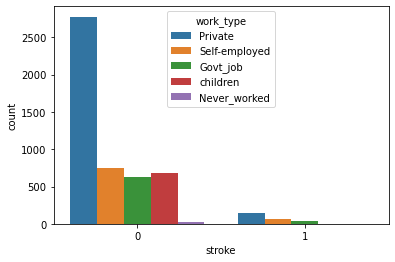

In [41]:
sns.countplot(x='stroke', hue='work_type', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

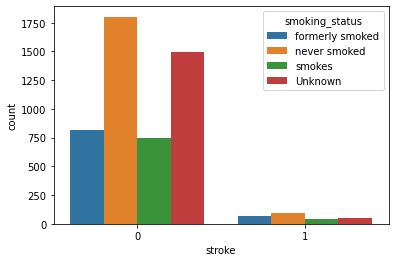

In [42]:
sns.countplot(x='stroke', hue='smoking_status', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

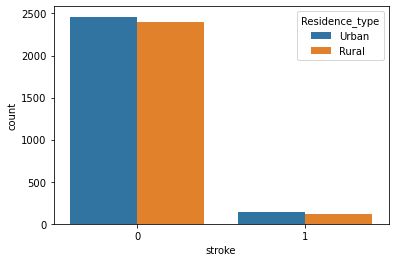

In [43]:
sns.countplot(x='stroke', hue='Residence_type', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

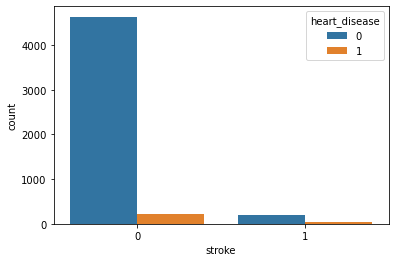

In [44]:
sns.countplot(x='stroke', hue='heart_disease', data=df)

<AxesSubplot:xlabel='stroke', ylabel='count'>

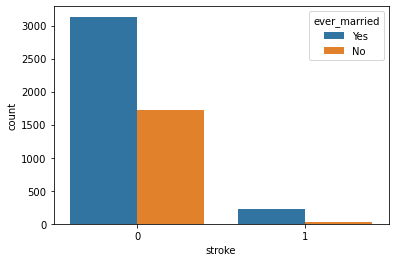

In [45]:
sns.countplot(x='stroke', hue='ever_married', data=df)

In [46]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)

In [47]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


In [48]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library 
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [49]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

In [50]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

NameError: name 'X_over' is not defined

In [ ]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
# importing random forest classifier module for training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Printing accuracy of the model
print('Accuracy:', accuracy_score(y_test, y_pred_rf))

In [51]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X_over, y_over, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

NameError: name 'rf_clf' is not defined

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import plot_confusion_matrix,precision_recall_fscore_support
plot_confusion_matrix(rf_clf,X_test,y_test)

In [ ]:
#Sample
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=1
work_type_Self_employed=0
work_type_children=0
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age','avg_glucose_level','bmi','gender_Male','hypertension_1','heart_disease_1','ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df)[0]
print(prediction)